# Design of Digital Filters

*This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Design of Non-Recursive Filters using the Frequency Sampling Method

For some applications, the desired frequency response is not given at all frequencies but rather at a number of discrete frequencies. For instance when the transfer function has been measured. In this case, the [window method](./window_method.ipynb) cannot be applied since the desired transfer function is not given analytically. The frequency sampling method provides a solution for the design of non-recursive filters.

### The Frequency Sampling Method

Let's assume that the desired transfer function $H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ is specified at a set of $N$ equally spaced frequencies $\Omega_\mu = \frac{2 \pi}{N} \mu$

\begin{equation}
H_\text{d}[\mu] = H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\frac{2 \pi}{N} \mu})
\end{equation}

for $\mu = 0, 1, \dots, N-1$. The coefficients of a non-recursive filter with finite-length impulse response (FIR) can then be computed by inverse discrete Fourier transformation (DFT) of $H_\text{d}[\mu]$

\begin{equation}
h[k] = \text{DFT}_N^{-1} \{ H_\text{d}[\mu] \} = \frac{1}{N} \sum_{\mu = 0}^{N-1} H_\text{d}[\mu] \; \mathrm{e}^{\,\mathrm{j}\,\frac{2 \pi}{N} \mu\,k}
\end{equation}

for $k = 0,1, \dots, N-1$. 

In order to investigate the properties of the designed filter, its transfer function $H(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ is computed. It is given by discrete-time Fourier transformation (DTFT) of its impulse response $h[k]$

\begin{equation}
H(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \sum_{k = 0}^{N-1} h[k] \; \mathrm{e}^{\,-\mathrm{j}\,\Omega\,k} = 
\sum_{\mu = 0}^{N-1} H_\text{d}[\mu] \cdot \frac{1}{N} \sum_{k = 0}^{N-1} \mathrm{e}^{\,-\mathrm{j}\,k\,(\Omega - \frac{2 \pi}{N}\,\mu)}
\end{equation}

When comparing this result with the [interpolation of a DFT](../spectral_analysis_deterministic_signals/zero_padding.ipynb#Interpolation-of-the-Discrete-Fourier-Transformation), it can be concluded that $H(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ is yielded by interpolation of the desired transfer function $H_\text{d}[\mu]$

\begin{equation}
H(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \sum_{\mu=0}^{N-1} H_\text{d}[\mu] \cdot \mathrm{e}^{-\,\mathrm{j}\, \frac{( \Omega - \frac{2 \pi}{N} \mu ) (N-1)}{2}} \cdot \text{psinc}_N ( \Omega - \frac{2 \pi}{N} \mu)
\end{equation}

where $\text{psinc}_N(\cdot)$ denotes the $N$-th order periodic sinc function.

Both the transfer function of the filter $H(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ and the desired transfer function $H_\text{d}[\mu]$ are equal at the specified frequencies $\Omega_\mu = \frac{2 \pi}{N} \mu$. Values in between adjacent $\Omega_\mu$ are interpolated by the periodic sinc function. This is illustrated in the following.

#### Example: Approximation of an ideal low-pass

The design of an ideal low-pass filter using the frequency sampling method is considered. For $|\Omega| < \pi$ the transfer function of the ideal low-pass is given as

\begin{equation}
H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \begin{cases}
1 & \text{for } |\Omega| \leq \Omega_\text{c} \\
0 & \text{otherwise}
\end{cases}
\end{equation}

where $\Omega_\text{c}$ denotes its corner frequency. The desired transfer function $H_\text{d}[\mu]$ for the frequency sampling method is derived by sampling $H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$. Note that for sampling on the unit circle with $0 \leq \Omega < 2 \pi$, the periodicity $H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = H_\text{d}(\mathrm{e}^{\,\mathrm{j}(\Omega + n 2 \pi)})$ with $n \in \mathbb{Z}$ has to be considered.

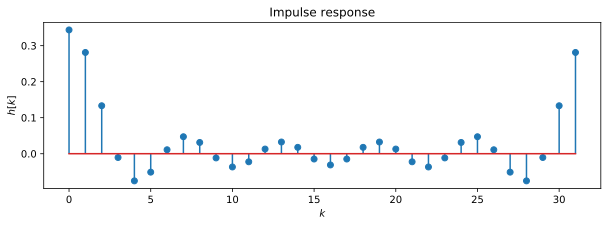

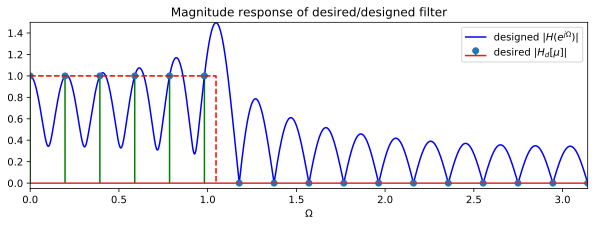

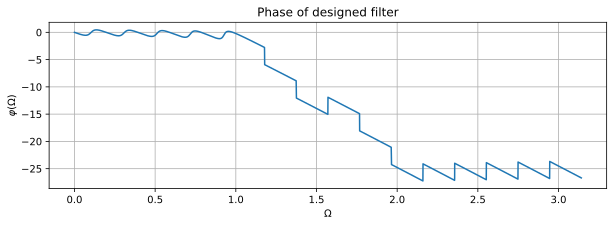

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
%matplotlib inline

N = 32  # length of filter
Omc = np.pi/3  # corner frequency of low-pass

# specify desired frequency response
Ommu = 2*np.pi/N*np.arange(N)
Hd = np.zeros(N)
Hd[Ommu <= Omc] = 1
Hd[Ommu >= (2*np.pi-Omc)] = 1

# compute impulse response of filter
h = np.fft.ifft(Hd)
h = np.real(h)  # due to round-off errors
# compute frequency response of filter
Om, H = sig.freqz(h, worN=8192)

# plot impulse response
plt.figure(figsize=(10, 3))
plt.stem(h, use_line_collection=True)
plt.title('Impulse response')
plt.xlabel(r'$k$')
plt.ylabel(r'$h[k]$')
# plot transfer functions
plt.figure(figsize=(10, 3))
plt.plot(Om, np.abs(H), 'b-', label=r'designed $|H(e^{j \Omega})|$')
plt.stem(Ommu, np.abs(Hd), 'g', label=r'desired $|H_d[\mu]|$', use_line_collection=True)
plt.plot([0, Omc, Omc], [1, 1, 0], 'r--')
plt.title('Magnitude response of desired/designed filter')
plt.xlabel(r'$\Omega$')
plt.legend()
plt.axis([0, np.pi, -0.05, 1.5])
# plot phase
plt.figure(figsize=(10, 3))
plt.plot(Om, np.unwrap(np.angle(H)))
plt.title('Phase of designed filter')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$\varphi(\Omega)$')
plt.grid()

**Exercises**

* Does the resulting filter approximate the desired magnitude and phase response well?
* Increase the length `N` of the filter. Does the attenuation in the stop-band improve?

Solution: The desired magnitude and phase response is an ideal low-pass with zero-phase. The magnitude response of the designed filter approximates this only very coarsely and shows major ringing artifacts. The phase of the designed filter is also not zero for all frequencies. Increasing the length `N` of the filter does not improve the attenuation in the stop-band, it only changes the frequencies of the local minima of the ripples. The reason for the poor performance of the designed filter is the zero-phase of the desired transfer function which cannot be realized by a causal non-recursive system. This was [already discussed for the window method](../filter_design/window_method.ipynb#Zero-Phase-Filters). The frequency sampling method suffers additionally from time-domain aliasing due to the periodicity of the DFT.

### Time-Domain Aliasing

The impulse response $h_\text{d}[k]$ of the desired filter is given by inverse DTFT of its transfer function

\begin{equation}
h_\text{d}[k] = \mathcal{F}_*^{-1} \{ H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \} = 
\frac{1}{2 \pi} \int_{-\pi}^{\pi} H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \, \mathrm{e}^{\,\mathrm{j}\,\Omega} d\Omega
\end{equation}

The link between the impulse response $h_\text{d}[k]$ of the desired and the impulse response $h[k]$ of the designed filter is derived in the following by explicitly taking the sampling of the desired transfer function into account. The sampled transfer function $H_\text{d,S}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ follows from ideal sampling by multiplication with a series of Dirac impulses

\begin{equation}
H_\text{d,S}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \cdot 
\sum_{\mu = -\infty}^{\infty} \delta \left(\Omega - \frac{2 \pi}{N} \mu \right)
\end{equation}

Introducing the sampled transfer function into the inverse DTFT yields its inverse DFT. As above equation states essentially a convolution of two spectra, the convolution theorem of the DTFT applies. This yields

\begin{equation}
\begin{split}
h[k] &= h_\text{d}[k] * \mathcal{F}_*^{-1} \left\{ \sum_{\mu = -\infty}^{\infty} \delta \left(\Omega - \frac{2 \pi}{N} \mu \right) \right\} \\
&= h_\text{d}[k] * \sum_{l = -\infty}^{\infty} \delta[k - l \cdot N] \\
&= \sum_{l = -\infty}^{\infty} h_\text{d}[k - l \cdot N]
\end{split}
\end{equation}

This result states that the impulse response $h[k]$ of the designed filter is given by periodic summation of the impulse response $h_\text{d}[k]$ of the desired filter. If the impulse response of the desired filter is longer than $N$ samples, its shifted impulse responses will overlap. These overlaps are known as *time-domain aliasing*. 

The ideal low-pass constitutes a bandlimited system. Such systems have impulse responses of infinite length. In above example, the resulting time-domain aliasing is clearly visible at the end of the impulse response of the designed filter. Shifting the impulse response of the desired filter to the center limits the impact of time-domain aliasing. This holds also for a general zero-phase desired filter due to [symmetry of its impulse response](./window_method.ipynb#Zero-Phase-Filters). Again a linear-phase design is beneficial in such situations.

### Design of Linear-Phase Filters

As for the [window method](../filter_design/window_method.ipynb), the design of a digital filter with a generalized linear phase is considered in the following. For $|\Omega| < \pi$ its transfer function is given as

\begin{equation}
H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = A(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \cdot \mathrm{e}^{\,-\mathrm{j} \alpha \Omega + \mathrm{j} \beta}
\end{equation}

where $A(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \in \mathbb{R}$ denotes the amplitude of the filter, $-\alpha\,\Omega$ its linear phase and $\beta$ a constant phase offset. The impulse response $h[k]$ of a linear-phase filter shows specific symmetries which have already been discussed for the [design of linear-phase filters using the window method](../filter_design/window_method.ipynb#Causal-Linear-Phase-Filters). For the resulting four types of linear-phase FIR filters, the properties of $A(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ and the values of $\alpha$ and $\beta$ have to be chosen accordingly for the formulation of $H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ and $H_d[\mu]$, respectively. This is illustrated in the following for the design of a low-pass filter.

#### Example: Linear-phase approximation of an ideal low-pass

We aim at the approximation of an ideal low-pass as a linear-phase non-recursive FIR filter. For the sake of comparison with a similar [example for the window method](../filter_design/window_method.ipynb#Example:-Causal-linear-phase-approximation-of-ideal-low-pass), we choose a type 1 filter with odd filter length $N$, $\alpha = \frac{N-1}{2}$ and $\beta = 0$. The desired frequency response $H_\text{d}[\mu]$ is given by sampling

\begin{equation}
H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \mathrm{e}^{\,-\mathrm{j} \frac{N-1}{2} \Omega} \cdot \begin{cases}
1 & \text{for } |\Omega| \leq \Omega_\text{c} \\
0 & \text{otherwise}
\end{cases}
\end{equation}

which is defined for $|\Omega| < \pi$. Note that for sampling on the unit circle with $0 \leq \Omega < 2 \pi$, the periodicity $H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = H_\text{d}(\mathrm{e}^{\,\mathrm{j}(\Omega+ n 2 \pi)})$ for $n \in \mathbb{Z}$ has to be considered.

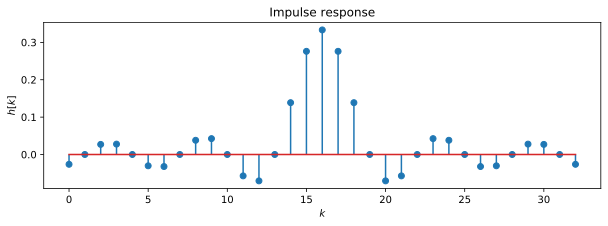

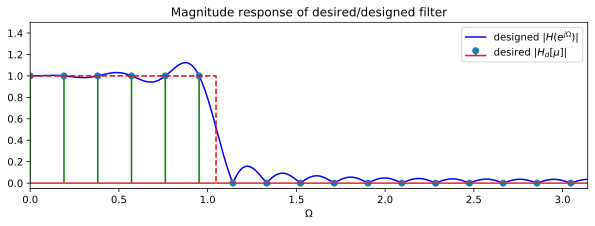

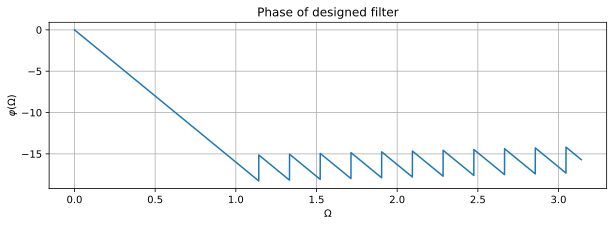

In [2]:
N = 33  # length of filter
Omc = np.pi/3  # corner frequency of low-pass

# specify desired frequency response
Ommu = 2*np.pi/N*np.arange(N)
Hd = np.zeros(N)
Hd[Ommu <= Omc] = 1
Hd[Ommu >= (2*np.pi-Omc)] = 1
Hd = Hd * np.exp(-1j*Ommu*(N-1)/2)

# compute impulse response of filter
h = np.fft.ifft(Hd)
h = np.real(h)  # due to round-off errors
# compute frequency response of filter
Om, H = sig.freqz(h, worN=8192)

# plot impulse response
plt.figure(figsize=(10, 3))
plt.stem(h, use_line_collection=True)
plt.title('Impulse response')
plt.xlabel(r'$k$')
plt.ylabel(r'$h[k]$')
# plot frequency response
plt.figure(figsize=(10, 3))
plt.plot(Om, np.abs(H), 'b-', label=r'designed $|H(e^{j \Omega})|$')
plt.stem(Ommu, np.abs(Hd), 'g',
         label=r'desired $|H_d[\mu]|$', use_line_collection=True)
plt.plot([0, Omc, Omc], [1, 1, 0], 'r--')
plt.title('Magnitude response of desired/designed filter')
plt.xlabel(r'$\Omega$')
plt.legend()
plt.axis([0, np.pi, -0.05, 1.5])
# plot phase
plt.figure(figsize=(10, 3))
plt.plot(Om, np.unwrap(np.angle(H)))
plt.title('Phase of designed filter')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$\varphi(\Omega)$')
plt.grid()

**Exercises**

* Does the designed filter have the desired linear phase?
* Increase the length `N` of the filter. What is different to the previous example?
* How could the method be modified to change the properties of the frequency response?

Solution: The designed filter has the desired linear phase in the pass-band, here below $\Omega = \frac{\pi}{3}$. Increasing the length `N` of the filter results in a better approximation of the desired ideal low-pass, especially in a higher attenuation in the stop-band. A window function could be applied to the impulse response of the designed filter in order to modify its properties.

### Comparison to Window Method

For a comparison of the frequency sampling to the [window method](../filter_design/window_method.ipynb) it is assumed that the desired frequency response $H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ is given. The coefficients $h[k]$ of an FIR approximation are then computed as follows

1. Window Method
\begin{align}
h_\text{d}[k] &= \mathcal{F}_{*}^{-1} \{ H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \} \\
h[k] &= h_\text{d}[k] \cdot w[k]
\end{align}

2. Frequency Sampling Method
\begin{align}
H_\text{d}[\mu] &= H_\text{d}(\mathrm{e}^{\,\mathrm{j} \frac{2 \pi}{N} \mu}) \\
h[k] &= \text{DFT}_N^{-1} \{ H_\text{d}[\mu] \}
\end{align}

For finite lengths $N$, the difference between both methods is related to the periodicity of the DFT. For a desired frequency response $H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ which does not result in a FIR $h_\text{d}[k]$ of length $N$, the inverse DFT in the frequency sampling method will suffer from time-domain aliasing. In the general case, filter coefficients computed by the window and frequency sampling method will hence differ.

However, for a rectangular window $w[k]$ and $N \to \infty$ both methods will become equivalent. This reasoning motivates an oversampled frequency sampling method, where $H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ is sampled at $M \gg N$ points in order to derive an approximation of $h_\text{d}[k]$ which is then windowed to the target length $N$. The method is beneficial in cases where a closed-form inverse DTFT of $H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$, as required for the window method, cannot be found.

#### Example: Oversampled frequency sampling method

We consider the design of a linear-phase approximation of an ideal low-pass filter using the oversampled frequency sampling method. For the sake of comparison, the parameters have been chosen in accordance to a [similar example using the window method](../filter_design/window_method.ipynb#Example:-Causal-linear-phase-approximation-of-ideal-low-pass). Using $H_\text{d}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ from the previous example in this section, the filter is computed by

1. (Over)-Sampling the desired response at $M$ frequencies
\begin{equation}
H_\text{d}[\mu] = H_\text{d}(\mathrm{e}^{\,\mathrm{j} \frac{2 \pi}{M} \mu})
\end{equation}

2. Inverse DFT of length $M$
\begin{equation}
h[k] = \text{DFT}_M^{-1} \{ H_\text{d}[\mu] \}
\end{equation}

3. Windowing to desired length $N$
\begin{equation}
h[k] = h_\text{d}[k] \cdot w[k]
\end{equation}



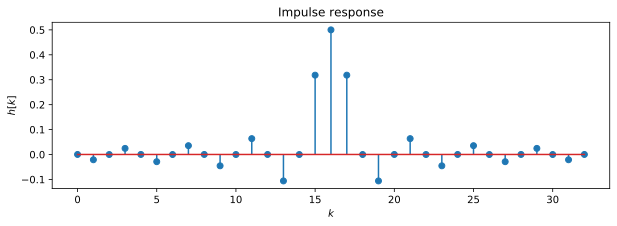

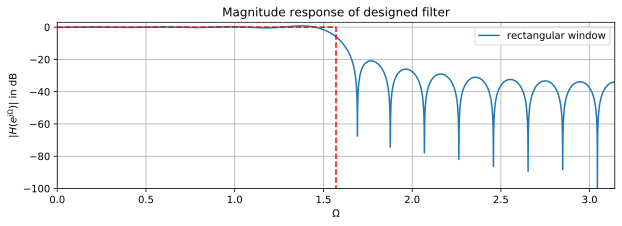

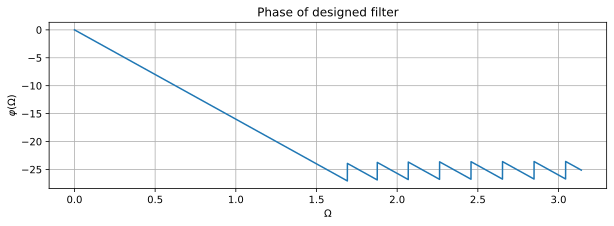

In [3]:
N = 33  # length of filter
M = 8192  # number of frequency samples
Omc = np.pi/2  # corner frequency of low-pass

# specify desired frequency response
Ommu = 2*np.pi/M*np.arange(M)
Hd = np.zeros(M)
Hd[Ommu <= Omc] = 1
Hd[Ommu >= (2*np.pi-Omc)] = 1
Hd = Hd * np.exp(-1j*Ommu*(N-1)/2)

# compute impulse response of filter
h = np.fft.ifft(Hd)
h = np.real(h)  # due to round-off errors
h = h[0:N]  # rectangular window
# compute frequency response of filter
Om, H = sig.freqz(h, worN=8192)

# plot impulse response
plt.figure(figsize=(10, 3))
plt.stem(h, use_line_collection=True)
plt.title('Impulse response')
plt.xlabel(r'$k$')
plt.ylabel(r'$h[k]$')
# plot frequency response
plt.figure(figsize=(10, 3))
plt.plot(Om, 20 * np.log10(abs(H)), label='rectangular window')
plt.plot([0, Omc, Omc], [0, 0, -100], 'r--')
plt.title('Magnitude response of designed filter')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$|H(e^{j \Omega})|$ in dB')
plt.axis([0, np.pi, -100, 3])
plt.legend()
plt.grid()
# plot phase
plt.figure(figsize=(10, 3))
plt.plot(Om, np.unwrap(np.angle(H)))
plt.title('Phase of designed filter')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$\varphi(\Omega)$')
plt.grid()

**Exercises**

* Compare the designed filter and its properties to the [same design using the window method](../filter_design/window_method.ipynb#Example:-Causal-linear-phase-approximation-of-ideal-low-pass)
* Change the number of samples `M` used for sampling the desired response. What changes if you increase/decrease `M`?

Solution: Comparison of above results to the window method (with a rectangular window) reveals that both provide a similar performance in terms of achievable stop-band attenuation. Increasing `M` in above example does not result in obvious changes since the initial choice constitutes already a high amount of oversampling. However, decreasing `M` till it is the range of the filter length `N` results in a smooth degradation of the performance towards the original (not oversampled) frequency sampling method.

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples*.